In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Loading the Dataset.

In [2]:
avDF = pd.read_csv('avocado.csv')

In [3]:
avDF.shape 

(18249, 14)

In [4]:
avDF

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


#### Feature column data type indicates that feature data are a mix of continuous and categorical data ,while target / label ('AveragePrice') data type indicates that dependent variable data is continuous in nature.

#### Checking for null / values missing

In [5]:
avDF.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

There are No null values / values missing from any of the columns in the dataframe.

### Dataframe Description:

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation

AveragePrice - the average price of a single avocado

type - conventional or organic

year - the year

Region - the city or region of the observation

Total Volume - Total number of avocados sold

4046 - Total number of avocados with PLU 4046 sold

4225 - Total number of avocados with PLU 4225 sold

4770 - Total number of avocados with PLU 4770 sold




Inspiration /Label 

The task is to make a model that can consider the data provided and predict the Average Price.

#### Removing 'Unnamed column' since it is an unnecessary column in the dataframe.

In [6]:
avDF.drop(columns = ['Unnamed: 0'],inplace = True)

In [7]:
avDF.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


#### Getting the basic summary and statistical information of the data.

In [8]:
avDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


Date is object type and has date type of data .

AveragePrice is float type and is continuous data.

Total Volume is float type and is continuous data.

4046 is float type and is continuous data.

4225 is float type and is continuous data.

4770 is float type and is continuous data.

Total Bags is float type and is continuous data.

Small Bags is float type and is continuous data.

Large Bags is float type and is continuous data.

XLarge Bags is float type and is continuous data.

type is object type and is categorical data.

year is object type and is categorical data.

region is object type and is categorical data.

In [9]:
avDF.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


From the above description it is observed that columns like Large Bags and XLarge Bags may contain outliers since there is a huge difference between 75% and max and their respective means and 50% also are significantly different.

A higher Std than mean in Total Bags, Small Bags and, XLarge Bags columns indicates skewness.

In [10]:
avDF.nunique() #Checking for unique elements in each of the columns

Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

Categorical columns:

type has 2 unique categories

region has 54 unique categories

year has 4 discrete values    


### This is a Regression Problem since the Target variable / Label column ("AveragePrice") has Continuous type of Data.

### Interpreting Relationship between Dependent and Independent Variables

#### Analyzing the Target Variable

<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

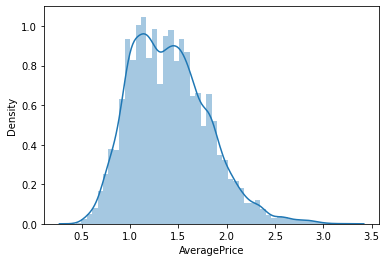

In [11]:
sns.distplot(avDF.AveragePrice)

In [12]:
avDF.AveragePrice.skew()

0.5803027378878419

From the graph above it is observed that the AveragePrice data forms a continuous distribution with mean of 1.405978 and tails off from 2.5 mark.

#### Analyzing the Feature Columns

In [13]:
avDF.type.unique()

array(['conventional', 'organic'], dtype=object)

'type' columns has 2 unique categories : 'conventional' and 'organic'.

In [14]:
avDF.type.value_counts() # to find the total values contained in each of the 2 categories.

conventional    9126
organic         9123
Name: type, dtype: int64

conventional  has  9126 values

organic  has  9123 values

<AxesSubplot:xlabel='type', ylabel='count'>

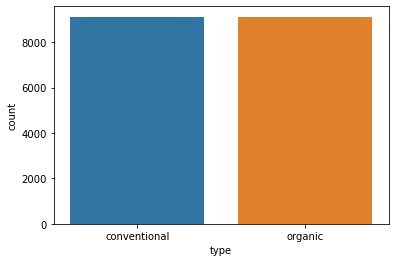

In [15]:
sns.countplot(avDF.type)

Nearly equal numbers of conventional and organic avocados were produced.

In [16]:
avDF.year.unique()

array([2015, 2016, 2017, 2018], dtype=int64)

The dataset covers data from 4 years : 2015, 2016, 2017, 2018

<AxesSubplot:xlabel='year', ylabel='count'>

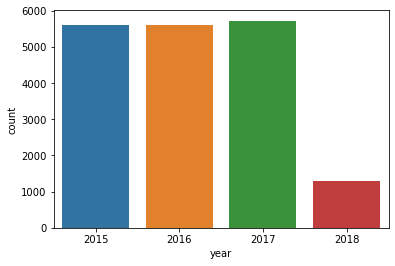

In [17]:
sns.countplot(avDF.year)

very small amount of data is available for 2018

In [18]:
avDF.region.nunique()

54

region column has 54 unique categories

In [19]:
avDF.region.value_counts()

HartfordSpringfield    338
Denver                 338
Midsouth               338
BuffaloRochester       338
Seattle                338
StLouis                338
BaltimoreWashington    338
California             338
Spokane                338
Chicago                338
SouthCentral           338
Plains                 338
GreatLakes             338
Boston                 338
Jacksonville           338
SouthCarolina          338
SanDiego               338
Orlando                338
Atlanta                338
Albany                 338
SanFrancisco           338
NewYork                338
PhoenixTucson          338
CincinnatiDayton       338
NewOrleansMobile       338
West                   338
Southeast              338
GrandRapids            338
RichmondNorfolk        338
TotalUS                338
Sacramento             338
Charlotte              338
Philadelphia           338
Tampa                  338
Detroit                338
Boise                  338
Houston                338
C

In [20]:
avDF.nunique()

Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

In [21]:
avDFtest = avDF.head(300) #taking a small sample of the main dataframe to analyse the data in the continuous type feature columns

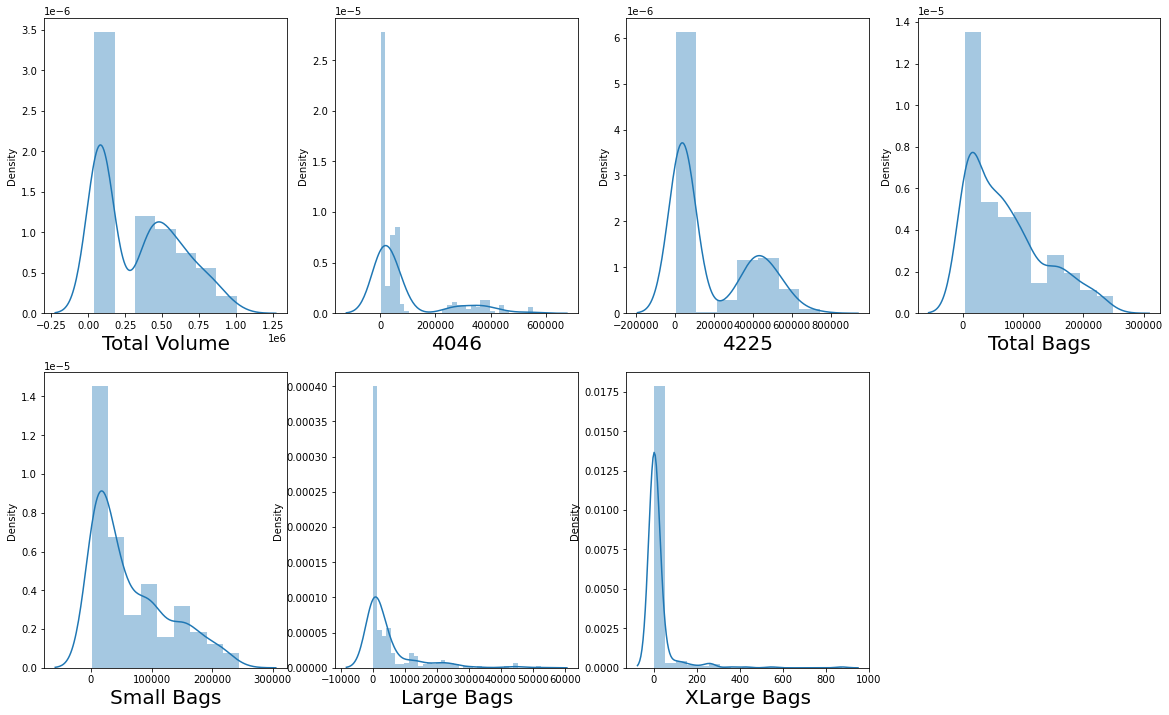

In [22]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
for col in avDFtest[['Total Volume','4046','4225','Total Bags','Small Bags','Large Bags','XLarge Bags']]:
    if plotnum<=10:
        plt.subplot(4,4,plotnum)
        sns.distplot(avDFtest[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

Total Volume, 4046, 4225 show a bimodal data distribution

Total Bags, Large Bags,Small Bags and, XLarge Bags columns have skewed data distribution

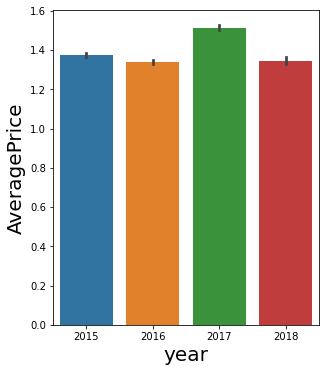

In [23]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
y = avDF['AveragePrice']
X = avDF[['year']]
for col in X:
    if plotnum<=23:
        plt.subplot(5,5,plotnum)
        sns.barplot(X[col],y)
        plt.xlabel(col,fontsize=20)
        plt.ylabel('AveragePrice',fontsize=20)
    plotnum+=1
plt.tight_layout()

It is observed that there was a spike in average price in the year 2017

Grouping the data date-wise to better understand the relationship between 'Date' and 'AveragePrice'

Text(0.5, 1.0, 'Average Price Trend')

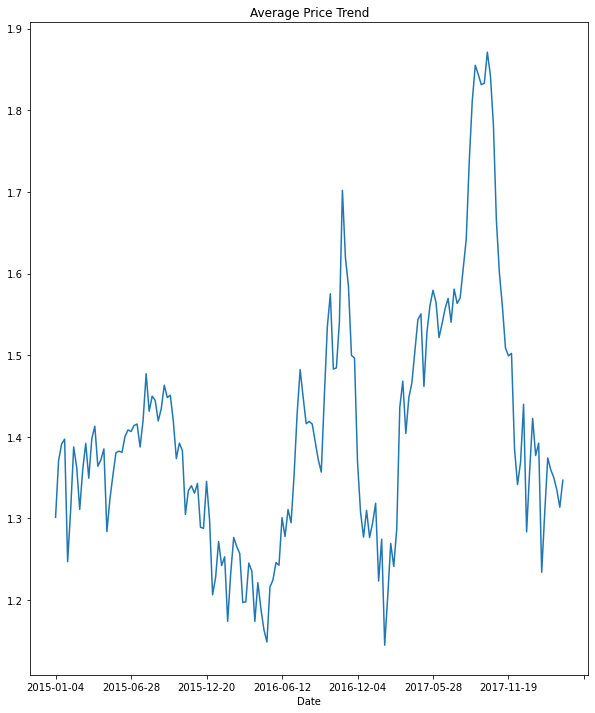

In [24]:
plt.figure(figsize=(10,12))
avDF.groupby('Date').mean()['AveragePrice'].plot()
plt.title('Average Price Trend')

It is observed from the graph above that the average price declined steeply from June of 2015 to June of 2016.
The Average price hit the highest point in 2017

<AxesSubplot:xlabel='type', ylabel='AveragePrice'>

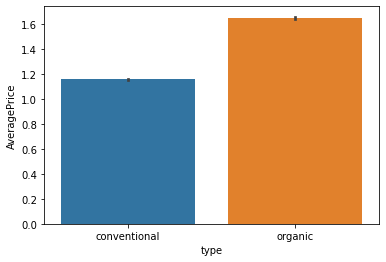

In [25]:
sns.barplot(x = 'type', y = 'AveragePrice', data = avDF)

Average price of 'Organic' produce is higher than that of 'conventional' produce.

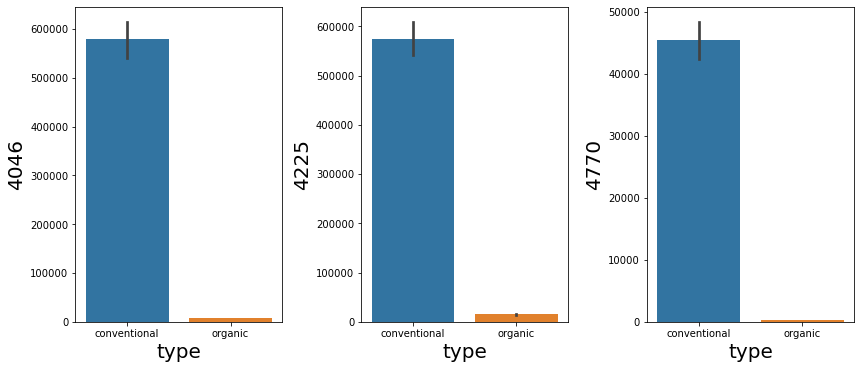

In [26]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
y = avDF[['4046','4225','4770']]
X = avDF['type']
for col in y:
    if plotnum<=23:
        plt.subplot(5,5,plotnum)
        sns.barplot(X,y[col])
        plt.xlabel('type',fontsize=20)
        plt.ylabel(col,fontsize=20)
    plotnum+=1
plt.tight_layout()

production of conventional type outnumbers that of organic type in the cases of 4046,4225 and 4770, which may also be a contributing factor to the higher average price of organic type.

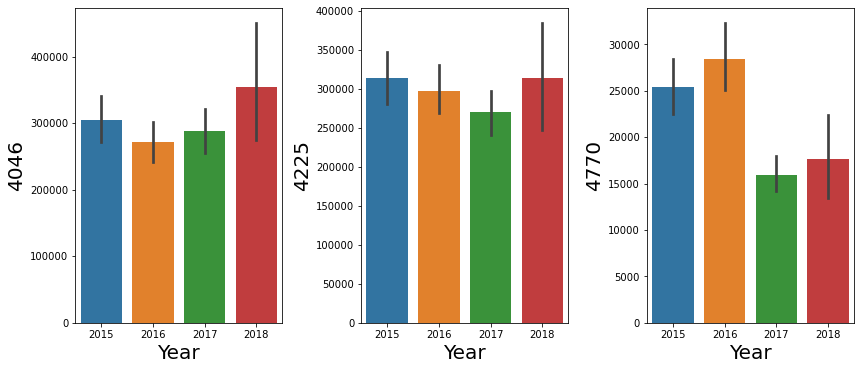

In [27]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
y = avDF[['4046','4225','4770']]
X = avDF['year']
for col in y:
    if plotnum<=23:
        plt.subplot(5,5,plotnum)
        sns.barplot(X,y[col])
        plt.xlabel('Year',fontsize=20)
        plt.ylabel(col,fontsize=20)
    plotnum+=1
plt.tight_layout()

Production of PLU 4046 has grown over the 4 years and is greater than the production of PLU 4225 and  PLU 4770, which is least produced. 

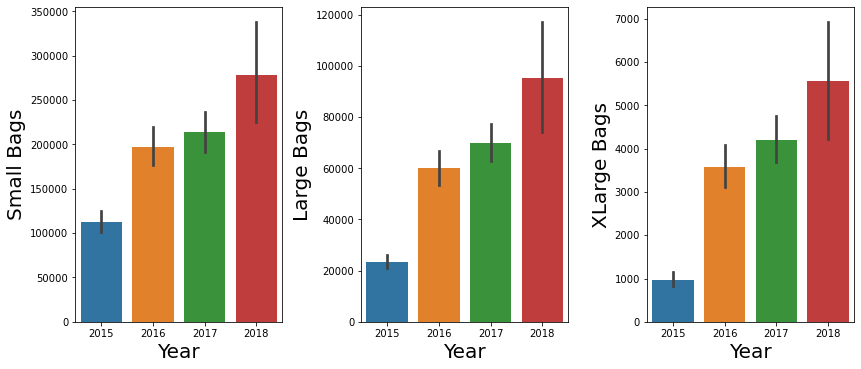

In [28]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
y = avDF[['Small Bags','Large Bags','XLarge Bags']]
X = avDF['year']
for col in y:
    if plotnum<=23:
        plt.subplot(5,5,plotnum)
        sns.barplot(X,y[col])
        plt.xlabel('Year',fontsize=20)
        plt.ylabel(col,fontsize=20)
    plotnum+=1
plt.tight_layout()

Production of all 3 types of bags has grown over the years. However Small Bags are produced far more than Large and Xlarge bags, while XLarge Bags are produced the least. 

In [29]:
avDF.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


##### From the above dataframe, it can be observed that:
    
##### Column 'Total Volume' is '4046'+'4046'+'4770'+'Total Bags'. Therefore dropping it as it is a highly dependent Feature.
(eg: 4046: 1036.74+ 4225: 54454.85+ 4770: 48.16+ Total Bags: 8696.87 = 64236.629(Total Volume))

#####  From the above dataframe, it can be observed that:
#####  Column 'Total Bags' is  'Small Bags' +	'Large Bags	' + 'XLarge Bags'. Therefore dropping it as it is a highly dependent Feature.
(eg: Small Bags : 8603.62+ Large Bags: 93.25+ XLarge Bags: 0.0 = 8696.87(Total Bags)

#### Creating 'Day' and 'Month' columns from 'Date' Columnn

In [30]:
avDF['Date']=pd.to_datetime(avDF['Date']) #creating datetime type dataframe

In [31]:
avDF['Day']=avDF['Date'].apply(lambda d:d.day) #mapping day values to 'Day' column in main dataframe

In [32]:
avDF['Month']=avDF['Date'].apply(lambda m:m.month) #mapping month values to 'Month' column in main dataframe


In [33]:
avDF

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Day,Month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,27,12
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,20,12
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,13,12
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,29,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,4,2
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,28,1
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,21,1
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,14,1


#### Dropping 'Date' column since  it doesn't contribute to building a good model for predicting the target variable values.

In [34]:
avDF.drop(columns = ['Date','Total Volume','Total Bags' ],inplace = True)

In [35]:
avDF

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region,Day,Month
0,1.33,1036.74,54454.85,48.16,8603.62,93.25,0.0,conventional,2015,Albany,27,12
1,1.35,674.28,44638.81,58.33,9408.07,97.49,0.0,conventional,2015,Albany,20,12
2,0.93,794.70,109149.67,130.50,8042.21,103.14,0.0,conventional,2015,Albany,13,12
3,1.08,1132.00,71976.41,72.58,5677.40,133.76,0.0,conventional,2015,Albany,6,12
4,1.28,941.48,43838.39,75.78,5986.26,197.69,0.0,conventional,2015,Albany,29,11
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,2046.96,1529.20,0.00,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,4,2
18245,1.71,1191.70,3431.50,0.00,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,28,1
18246,1.87,1191.92,2452.79,727.94,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,21,1
18247,1.93,1527.63,2981.04,727.01,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,14,1


### Checking for Outliers in continuous data type Features.

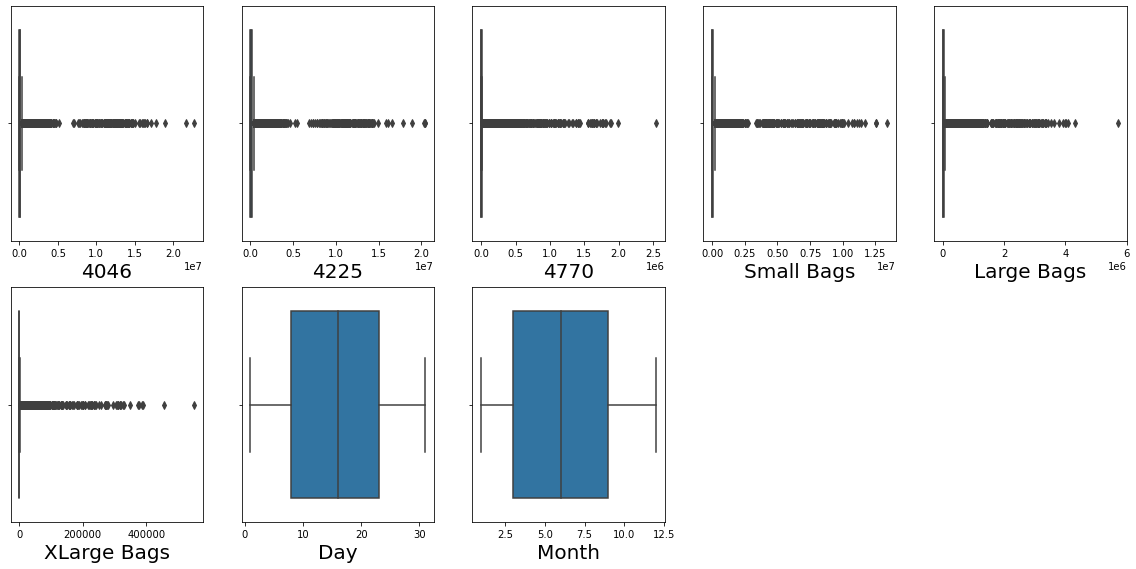

In [36]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
for col in avDF.drop(columns = ['year','type','region','AveragePrice'],axis=1):
    if plotnum<=11:
        plt.subplot(5,5,plotnum)
        sns.boxplot(avDF[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

There are outliers in all of the above columns

### Removing Outliers

#### Removing Outliers using Z score Method

In [37]:
df2 =avDF.drop(columns = ['year','type','region','AveragePrice'],axis=1).copy() #making a copy of all continuous data type columns.

In [38]:
df2

,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,Day,Month
0,1036.74,54454.85,48.16,8603.62,93.25,0.0,27,12
1,674.28,44638.81,58.33,9408.07,97.49,0.0,20,12
2,794.70,109149.67,130.50,8042.21,103.14,0.0,13,12
3,1132.00,71976.41,72.58,5677.40,133.76,0.0,6,12
4,941.48,43838.39,75.78,5986.26,197.69,0.0,29,11
...,...,...,...,...,...,...,...,...
18244,2046.96,1529.20,0.00,13066.82,431.85,0.0,4,2
18245,1191.70,3431.50,0.00,8940.04,324.80,0.0,28,1
18246,1191.92,2452.79,727.94,9351.80,42.31,0.0,21,1
18247,1527.63,2981.04,727.01,10919.54,50.00,0.0,14,1


In [39]:
from scipy.stats import zscore
zscor = zscore(df2)
z_score_abs = np.abs(zscor)

df3 = df2[(z_score_abs < 3).all(axis=1)] #taking 3 as threshold value

In [40]:
df3.shape

(17782, 8)

In [41]:
df2.shape

(18249, 8)

##### Data loss %:

In [42]:
loss=(18249-17782)/18249 * 100
loss

2.55904433119623

2.55% Data loss is within acceptable range

#### Using IQR Method

In [43]:
df =avDF.drop(columns = ['year','type','region','AveragePrice'],axis=1).copy() #making a copy of all continuous data type columns.

In [44]:
indxdrop = np.array([])
for colm in df:
    q1 = df[colm].quantile(0.25)
    q3 = df[colm].quantile(0.75)
    iqr = q3-q1
    upperval = q3 + (1.5*iqr)
    lowerval = q1 - (1.5*iqr)
    col = df[colm]
    indx = col[(col > upperval) | (col < lowerval)].index
    indxdrop = np.append(indxdrop, indx)
# find all the indices of outliers in the columns using IQR and append them to indxdrop array 

In [45]:
indxdrop 

array([   52.,    54.,    55., ...,  9121., 18220., 18232.])

In [46]:
df = df.drop(indxdrop)

In [47]:
df.shape

(11747, 8)

##### Data loss %:

In [48]:
loss=(18249-11747)/18249 * 100
loss

35.62934955340019

35.62% data loss is outside acceptable range.

#### Therefore, Using Z score method to reduce outliers

In [49]:
dropindx = avDF.index.difference(df3.index)

In [50]:
dropindx

Int64Index([ 346,  359,  780,  781,  783,  787,  788,  790,  791,  792,
            ...
            9104, 9105, 9106, 9107, 9108, 9109, 9110, 9111, 9112, 9113],
           dtype='int64', length=467)

In [51]:
avDF.drop(dropindx,inplace = True) #dropping the outliers from original features Dataframe


In [52]:
avDF

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region,Day,Month
0,1.33,1036.74,54454.85,48.16,8603.62,93.25,0.0,conventional,2015,Albany,27,12
1,1.35,674.28,44638.81,58.33,9408.07,97.49,0.0,conventional,2015,Albany,20,12
2,0.93,794.70,109149.67,130.50,8042.21,103.14,0.0,conventional,2015,Albany,13,12
3,1.08,1132.00,71976.41,72.58,5677.40,133.76,0.0,conventional,2015,Albany,6,12
4,1.28,941.48,43838.39,75.78,5986.26,197.69,0.0,conventional,2015,Albany,29,11
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,2046.96,1529.20,0.00,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,4,2
18245,1.71,1191.70,3431.50,0.00,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,28,1
18246,1.87,1191.92,2452.79,727.94,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,21,1
18247,1.93,1527.63,2981.04,727.01,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,14,1


In [53]:
avDF.reset_index(drop=True,inplace = True) #resetting the index of the dataframe

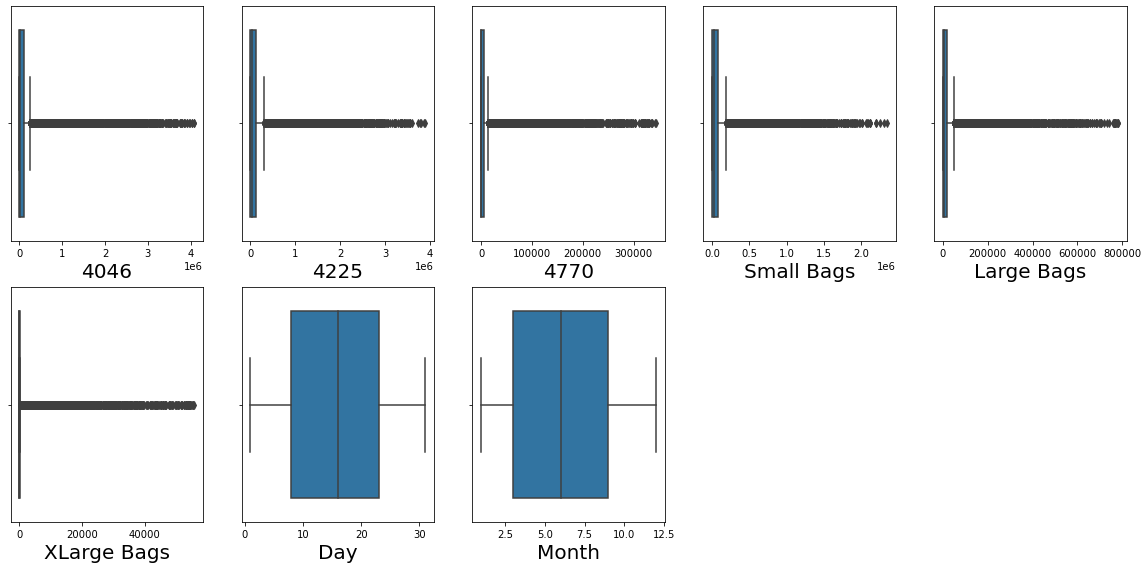

In [54]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
for col in avDF.drop(columns = ['year','type','region','AveragePrice'],axis=1):
    if plotnum<=11:
        plt.subplot(5,5,plotnum)
        sns.boxplot(avDF[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

Some amount of outliers has been removed.

### Checking for skewness in data distributions

In [55]:
avDF.skew()

AveragePrice    0.560969
4046            4.928850
4225            4.472729
4770            5.137120
Small Bags      4.238647
Large Bags      5.072468
XLarge Bags     6.159391
year            0.220792
Day             0.011251
Month           0.098217
dtype: float64

#### Normalizing Data Distribution using PowerTransformer

In [56]:
from sklearn.preprocessing import PowerTransformer

In [57]:
powtrans= PowerTransformer(method='yeo-johnson', standardize=True)

In [58]:
df4 = avDF.drop(columns = ['year','type','region','AveragePrice'],axis=1)

In [59]:
transformed= powtrans.fit_transform(df4)

In [60]:
type(transformed)

numpy.ndarray

In [61]:
transformed = pd.DataFrame(transformed, columns=df4.columns) #to convert numpy array back into dataframe


In [62]:
transformed.skew()

4046          -0.038259
4225          -0.043246
4770           0.028015
Small Bags    -0.024657
Large Bags    -0.110061
XLarge Bags    0.860603
Day           -0.209306
Month         -0.149112
dtype: float64

In [63]:
transformed.index = avDF.index

In [64]:
Skewed = ['4046','4225','4770','Small Bags','Large Bags','XLarge Bags']

In [65]:
avDF[Skewed] = transformed[Skewed]

In [66]:
avDF.skew()

AveragePrice    0.560969
4046           -0.038259
4225           -0.043246
4770            0.028015
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags     0.860603
year            0.220792
Day             0.011251
Month           0.098217
dtype: float64

A lot of skewness has been removed.

In [67]:
avDFtest = avDF.head(300) #taking a small sample of the main dataframe to analyse the skewness of data in the continuous type feature columns

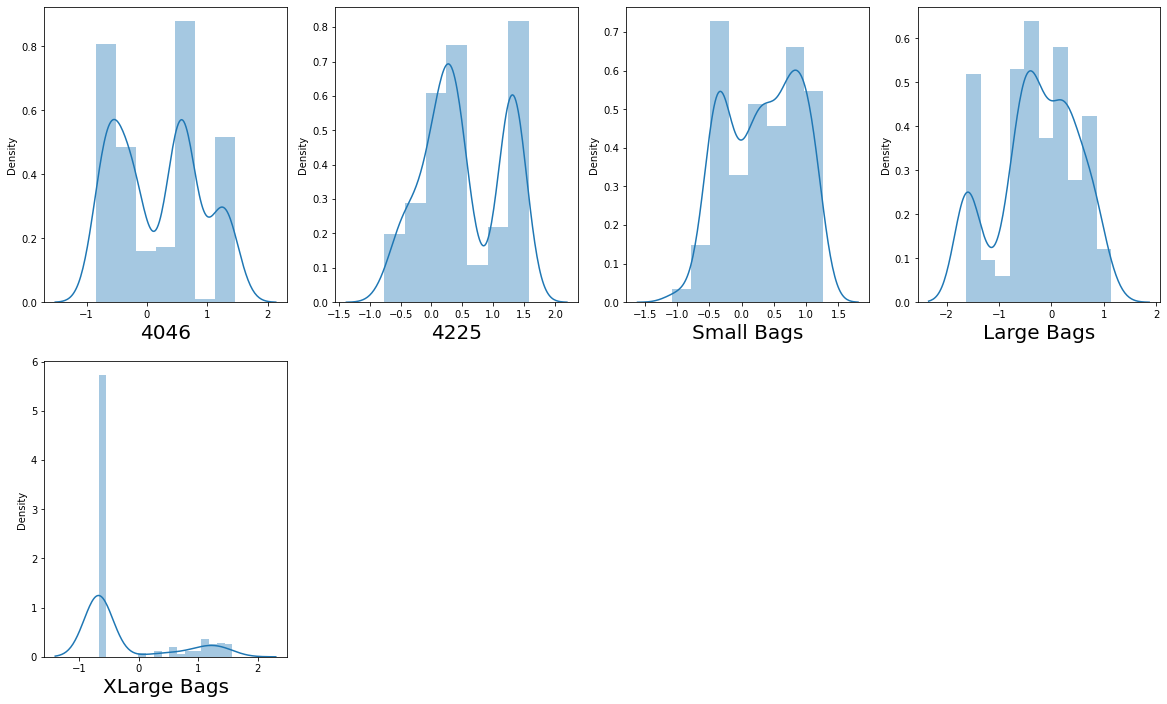

In [68]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
for col in avDFtest[['4046','4225','Small Bags','Large Bags','XLarge Bags']]:
    if plotnum<=10:
        plt.subplot(4,4,plotnum)
        sns.distplot(avDFtest[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

Data Distribution looks much more normalised now.

### Encoding Categorical Columns

####  Encoding 'type' using get_dummies()

In [69]:
dumm = pd.get_dummies(avDF[['type']],drop_first = False)

In [70]:
dumm

,type_conventional,type_organic
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
17777,0,1
17778,0,1
17779,0,1
17780,0,1


In [71]:
avDF = avDF.join(dumm)

In [72]:
avDF.drop(columns = ['type'],inplace=True)

In [73]:
avDF

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,year,region,Day,Month,type_conventional,type_organic
0,1.33,-0.649918,0.358278,-0.212550,-0.337064,-0.775214,-0.675702,2015,Albany,27,12,1,0
1,1.35,-0.770067,0.276355,-0.165117,-0.301038,-0.765237,-0.675702,2015,Albany,20,12,1,0
2,0.93,-0.724508,0.656010,0.034215,-0.364044,-0.752534,-0.675702,2015,Albany,13,12,1,0
3,1.08,-0.625017,0.475615,-0.110976,-0.500341,-0.693012,-0.675702,2015,Albany,6,12,1,0
4,1.28,-0.677083,0.268966,-0.100289,-0.479918,-0.600755,-0.675702,2015,Albany,29,11,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17777,1.63,-0.454078,-0.922232,-1.224990,-0.165765,-0.405895,-0.675702,2018,WestTexNewMexico,4,2,0,1
17778,1.71,-0.610403,-0.665649,-1.224990,-0.321645,-0.478556,-0.675702,2018,WestTexNewMexico,28,1,0,1
17779,1.87,-0.610350,-0.774395,0.455355,-0.303466,-0.945246,-0.675702,2018,WestTexNewMexico,21,1,0,1
17780,1.93,-0.539211,-0.711605,0.455045,-0.240252,-0.910471,-0.675702,2018,WestTexNewMexico,14,1,0,1


#### Encoding 'region' using Label Encoder

In [74]:
from sklearn.preprocessing import LabelEncoder

In [75]:
labenc = LabelEncoder()

In [76]:
avDF.region = labenc.fit_transform(avDF.region)

In [77]:
avDF

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,year,region,Day,Month,type_conventional,type_organic
0,1.33,-0.649918,0.358278,-0.212550,-0.337064,-0.775214,-0.675702,2015,0,27,12,1,0
1,1.35,-0.770067,0.276355,-0.165117,-0.301038,-0.765237,-0.675702,2015,0,20,12,1,0
2,0.93,-0.724508,0.656010,0.034215,-0.364044,-0.752534,-0.675702,2015,0,13,12,1,0
3,1.08,-0.625017,0.475615,-0.110976,-0.500341,-0.693012,-0.675702,2015,0,6,12,1,0
4,1.28,-0.677083,0.268966,-0.100289,-0.479918,-0.600755,-0.675702,2015,0,29,11,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17777,1.63,-0.454078,-0.922232,-1.224990,-0.165765,-0.405895,-0.675702,2018,53,4,2,0,1
17778,1.71,-0.610403,-0.665649,-1.224990,-0.321645,-0.478556,-0.675702,2018,53,28,1,0,1
17779,1.87,-0.610350,-0.774395,0.455355,-0.303466,-0.945246,-0.675702,2018,53,21,1,0,1
17780,1.93,-0.539211,-0.711605,0.455045,-0.240252,-0.910471,-0.675702,2018,53,14,1,0,1


### Finding Correlation 

In [78]:
a_corr =avDF.corr()

In [79]:
a_corr.head(23)

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,year,region,Day,Month,type_conventional,type_organic
AveragePrice,1.000000,-0.548618,-0.448579,-0.491320,-0.493621,-0.477879,-0.387285,0.099910,0.010428,0.024742,0.157900,-0.608447,0.608447
4046,-0.548618,1.000000,0.764679,0.736523,0.778765,0.601899,0.573880,-0.002396,0.159390,-0.004558,-0.025919,0.725826,-0.725826
4225,-0.448579,0.764679,1.000000,0.796799,0.784901,0.614878,0.584508,-0.004533,0.032273,-0.005919,-0.024708,0.747722,-0.747722
4770,-0.491320,0.736523,0.796799,1.000000,0.754305,0.548457,0.616413,-0.051657,0.037805,0.001383,-0.017377,0.780988,-0.780988
Small Bags,-0.493621,0.778765,0.784901,0.754305,1.000000,0.566307,0.603334,0.185955,0.051985,-0.000535,-0.010260,0.720466,-0.720466
Large Bags,-0.477879,0.601899,0.614878,0.548457,0.566307,1.000000,0.452650,0.190295,0.086573,-0.000876,-0.016942,0.500026,-0.500026
XLarge Bags,-0.387285,0.573880,0.584508,0.616413,0.603334,0.452650,1.000000,0.159574,-0.020865,0.010241,0.018751,0.665587,-0.665587
year,0.099910,-0.002396,-0.004533,-0.051657,0.185955,0.190295,0.159574,1.000000,-0.003610,0.004044,-0.173166,-0.007399,0.007399
region,0.010428,0.159390,0.032273,0.037805,0.051985,0.086573,-0.020865,-0.003610,1.000000,0.000751,0.002175,-0.021970,0.021970
Day,0.024742,-0.004558,-0.005919,0.001383,-0.000535,-0.000876,0.010241,0.004044,0.000751,1.000000,0.010456,0.002469,-0.002469


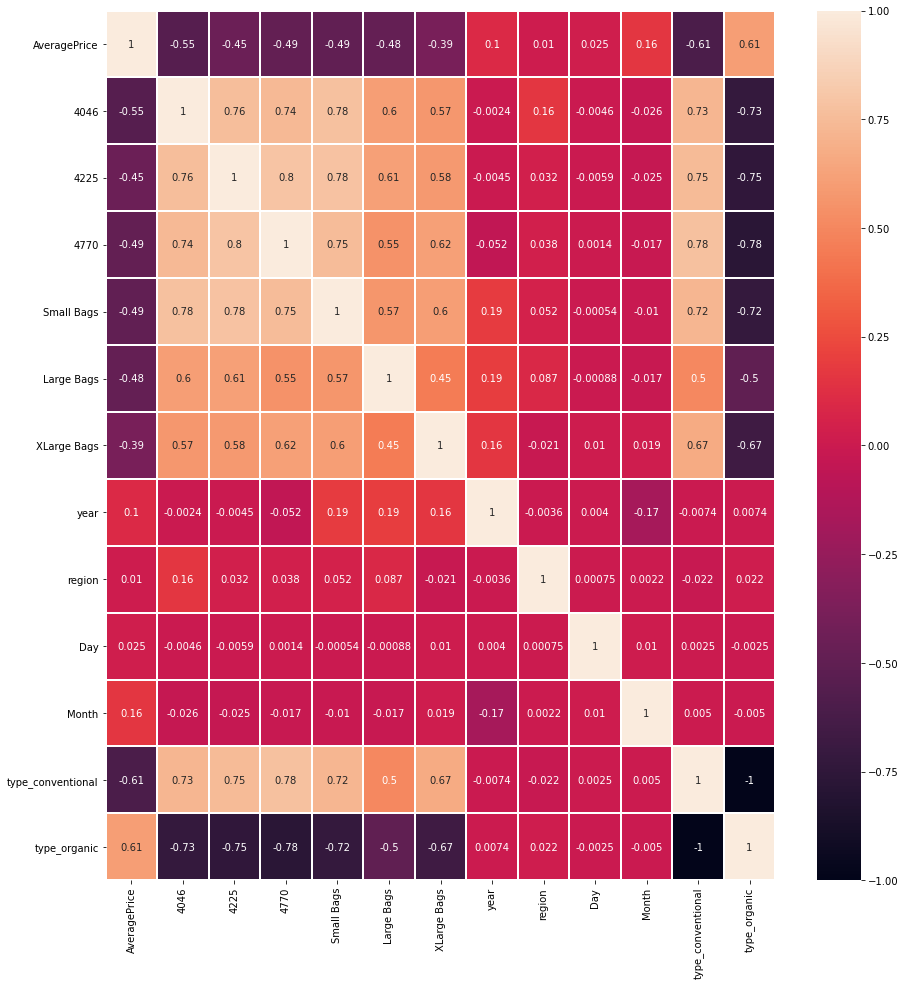

In [80]:
plt.figure(figsize=(15,16))
sns.heatmap(a_corr,annot=True,linewidth=1)
plt.show()

### Visualizing correlation of feature columns with label column.

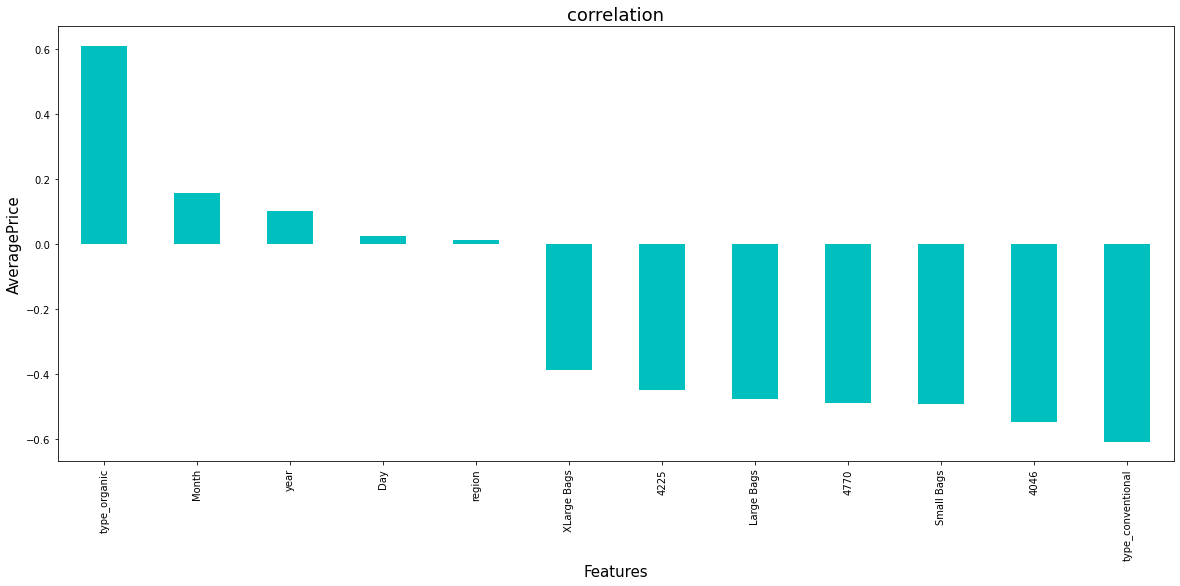

In [81]:
plt.figure(figsize = (20,8))
avDF.corr()['AveragePrice'].sort_values(ascending = False).drop(['AveragePrice']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('AveragePrice',fontsize=15)
plt.title('correlation',fontsize = 18)
plt.show()

#### From the above graph it can be observed that 'type_organic' has the highest positive correlation with 'AveragePrice', 'type_conventional' has the highest negative correlation while 'region' has the weakest correlation.

### Feature Selection

In [82]:
from sklearn.preprocessing import StandardScaler

In [83]:
X =avDF.drop(columns=['AveragePrice'])
y =avDF['AveragePrice']

In [84]:
scaler= StandardScaler()

In [85]:
scaled_X = scaler.fit_transform(X)

### Checking for Multicollinearity using Variance Inflation Factor

In [86]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [91]:
vif = pd.DataFrame()

In [92]:
vif["Features"] = X.columns
vif['vif'] = [variance_inflation_factor(scaled_X,i) for i in range(scaled_X.shape[1])]

In [93]:
vif

,Features,vif
0,4046,3.723160
1,4225,4.139977
2,4770,3.940502
3,Small Bags,4.103569
4,Large Bags,1.866024
5,XLarge Bags,2.039339
6,year,1.359839
7,region,1.079283
8,Day,1.000506
9,Month,1.051207


There is no multicollinearity

### Selecting Kbest Features

In [94]:
from sklearn.feature_selection import SelectKBest, f_classif

In [96]:
bestfeat = SelectKBest(score_func = f_classif, k = 12)
fit = bestfeat.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [97]:
fit = bestfeat.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(22,'Score'))

              Feature      Score
11       type_organic  49.966168
10  type_conventional  49.966168
0                4046  36.480181
2                4770  27.651101
3          Small Bags  25.039951
4          Large Bags  23.354747
1                4225  21.772853
5         XLarge Bags  15.065353
6                year   3.163539
9               Month   2.850599
7              region   1.291093
8                 Day   1.249095


Selecting the best features based on scores above

In [87]:
xbest = X.drop(columns=['region','Day'])

In [88]:
xbest

,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,year,Month,type_conventional,type_organic
0,-0.649918,0.358278,-0.212550,-0.337064,-0.775214,-0.675702,2015,12,1,0
1,-0.770067,0.276355,-0.165117,-0.301038,-0.765237,-0.675702,2015,12,1,0
2,-0.724508,0.656010,0.034215,-0.364044,-0.752534,-0.675702,2015,12,1,0
3,-0.625017,0.475615,-0.110976,-0.500341,-0.693012,-0.675702,2015,12,1,0
4,-0.677083,0.268966,-0.100289,-0.479918,-0.600755,-0.675702,2015,11,1,0
...,...,...,...,...,...,...,...,...,...,...
17777,-0.454078,-0.922232,-1.224990,-0.165765,-0.405895,-0.675702,2018,2,0,1
17778,-0.610403,-0.665649,-1.224990,-0.321645,-0.478556,-0.675702,2018,1,0,1
17779,-0.610350,-0.774395,0.455355,-0.303466,-0.945246,-0.675702,2018,1,0,1
17780,-0.539211,-0.711605,0.455045,-0.240252,-0.910471,-0.675702,2018,1,0,1


In [89]:
xbest_ss = scaler.fit_transform(xbest) #Scaling features using Standard Scaler

#### The Data to be predicted in Target / Label column is continuous in nature since it is the Average Price. Therefore Regression Models will be used.

## Regression Model Building

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
from sklearn.metrics import r2_score

#### Finding the Best Random State

In [140]:
from sklearn.ensemble import RandomForestRegressor
maxAcc = 0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(xbest_ss,y,test_size = .33, random_state = i)
    modRF =  RandomForestRegressor()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc  = r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

Best Accuracy is: 0.8185411358600545 on random_state: 11


In [92]:
x_train,x_test,y_train,y_test = train_test_split(xbest_ss,y,test_size = .33, random_state =11)

In [93]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR



In [94]:
from sklearn.metrics import r2_score,mean_squared_error

In [95]:
rf = RandomForestRegressor()
dt = DecisionTreeRegressor()
xg = XGBRegressor()
SV= SVR()
r=Ridge()

### Training the Models

In [96]:
rf.fit(x_train,y_train)
xg.fit(x_train,y_train)
SV.fit(x_train,y_train)
r.fit(x_train,y_train)
dt.fit(x_train,y_train)

DecisionTreeRegressor()

All models have been trained.

### Ridge Regression Model

In [97]:
y_r_pred = r.predict(x_test)

####  R2 Score

In [98]:
r2_score(y_test,y_r_pred)

0.5116272273529452

#### Mean Squared Error 

In [99]:
mean_squared_error(y_test,y_r_pred)

0.0794600479383405

#### Root Mean Squared Error

In [100]:
np.sqrt(mean_squared_error(y_test,y_r_pred))

0.28188658701389196

###  Random Forest Regression Model

In [126]:
y_rf_pred = rf.predict(x_test)

#### R2 Score

In [127]:
r2_score(y_test,y_rf_pred)

0.8700720959088508

#### Mean Squared Error

In [103]:
mean_squared_error(y_test,y_rf_pred)

0.021139748294428353

#### Root Mean Squared Error

In [104]:
np.sqrt(mean_squared_error(y_test,y_rf_pred))

0.14539514536059434

### XGB Regression Model 

In [105]:
y_xg_pred = xg.predict(x_test)

####  R2 Score

In [106]:
r2_score(y_test,y_xg_pred)

0.8555557182982444

#### Mean Squared Error

In [107]:
mean_squared_error(y_test,y_xg_pred)

0.023501616370279192

#### Root Mean Squared Error

In [108]:
np.sqrt(mean_squared_error(y_test,y_xg_pred))

0.15330236909545525

### Support Vector Regression Model

In [109]:
y_svr_pred = SV.predict(x_test)

####  R2 Score

In [110]:
r2_score(y_test,y_svr_pred)

0.7759036796926365

#### Mean Squared Error

In [111]:
mean_squared_error(y_test,y_svr_pred)

0.036461296271521774

#### Root Mean Squared Error

In [112]:
np.sqrt(mean_squared_error(y_test,y_svr_pred))

0.19094841259230666

###  Decision Tree Regression Model

In [113]:
y_dt_pred = dt.predict(x_test)

####  R2 Score

In [123]:
r2_score(y_test,y_dt_pred)

0.7090878623493064

#### Mean Squared Error

In [115]:
mean_squared_error(y_test,y_dt_pred)

0.04733247571988413

#### Root Mean Squared Error

In [116]:
np.sqrt(mean_squared_error(y_test,y_dt_pred))

0.2175602806577619

### Model Cross Validation

In [117]:
from sklearn.model_selection import ShuffleSplit,cross_val_score

#### Ridge Regression

In [129]:
cross_val_score(r,xbest_ss,y,cv=ShuffleSplit(5)).mean()

0.5016289816080144

#### Random Forest Regression

In [119]:
cross_val_score(rf,xbest_ss,y,cv=ShuffleSplit(5)).mean()

0.8764845555289419

#### XGB Regression

In [132]:
cross_val_score(xg,xbest_ss,y,cv=ShuffleSplit(5)).mean()

0.8612156752152014

#### SV Regression

In [121]:
cross_val_score(SV,xbest_ss,y,cv=ShuffleSplit(5)).mean()

0.7683692728802718

#### Decision Tree Regression

In [122]:
cross_val_score(dt,xbest_ss,y,cv=ShuffleSplit(5)).mean()

0.7486181288702288

### Based on comparing Accuracy Score results with Cross Validation results, it is determined that Random Forest Regressor is the best model. It also has the lowest Root Mean Squared Error score

### Hyper Parameter Tuning

#### Random Forest Regressor

In [133]:
parameter = {'n_estimators':[30,60,80],'max_depth': [10,20,40],'min_samples_leaf':[5,10,20],'min_samples_split':[5,10],'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}

In [134]:
GridCV = GridSearchCV(RandomForestRegressor(),parameter,cv=5,n_jobs = -1,verbose = 1)

In [135]:
GridCV.fit(x_train,y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [10, 20, 40],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [5, 10, 20],
                         'min_samples_split': [5, 10],
                         'n_estimators': [30, 60, 80]},
             verbose=1)

In [136]:
GridCV.best_params_

{'criterion': 'mse',
 'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 60}

In [137]:
Best_mod = RandomForestRegressor(n_estimators = 60,criterion = 'mse', max_depth= 20, max_features = 'auto',min_samples_leaf = 5, min_samples_split = 10)


In [141]:
Best_mod.fit(x_train,y_train)

RandomForestRegressor(max_depth=20, min_samples_leaf=5, min_samples_split=10,
                      n_estimators=60)

In [142]:
rfpred = Best_mod.predict(x_test)
acc = r2_score(y_test,rfpred)
print(acc*100)


85.07049167576749


##### Random Forest Regressor has an accuracy of 85.07%

#### Saving The Model

In [143]:
import joblib
joblib.dump(Best_mod,"BestModelAvocado.pkl")

['BestModelAvocado.pkl']

#### Loading The Model

In [144]:
mod=joblib.load("BestModelAvocado.pkl")

In [145]:
print(mod.predict(x_test))

[1.44029639 1.13008646 1.15335455 ... 1.27292942 1.9989922  1.29243967]


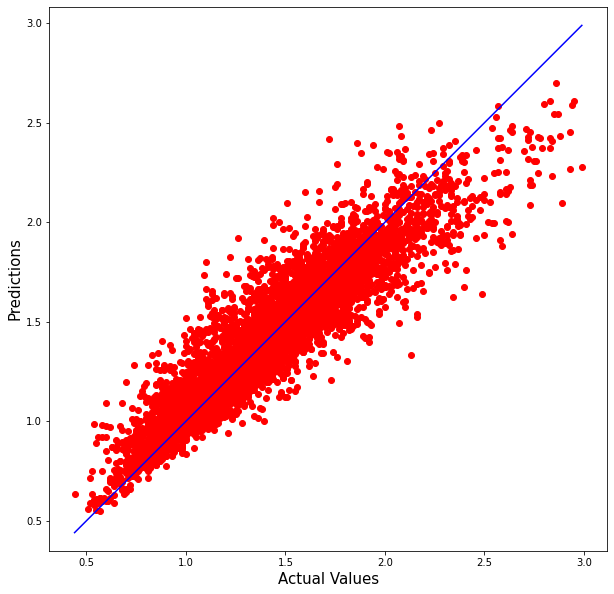

In [146]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, rfpred, c='red')
plt.yscale('linear')
plt.xscale('linear')

p1 = max(max(rfpred), max(y_test))
p2 = min(min(rfpred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()